# **Apriori Algorithm for Market Basket Analysis: A Comprehensive Guide to Association Rule Mining**

This notebook provides a thorough exploration of the Apriori algorithm applied to market basket analysis. It details the process of identifying frequent itemsets and generating association rules to uncover valuable purchase patterns. The guide includes practical code examples, parameter explanations, and visualizations to facilitate understanding and implementation.

# **What is the Apriori Model?**

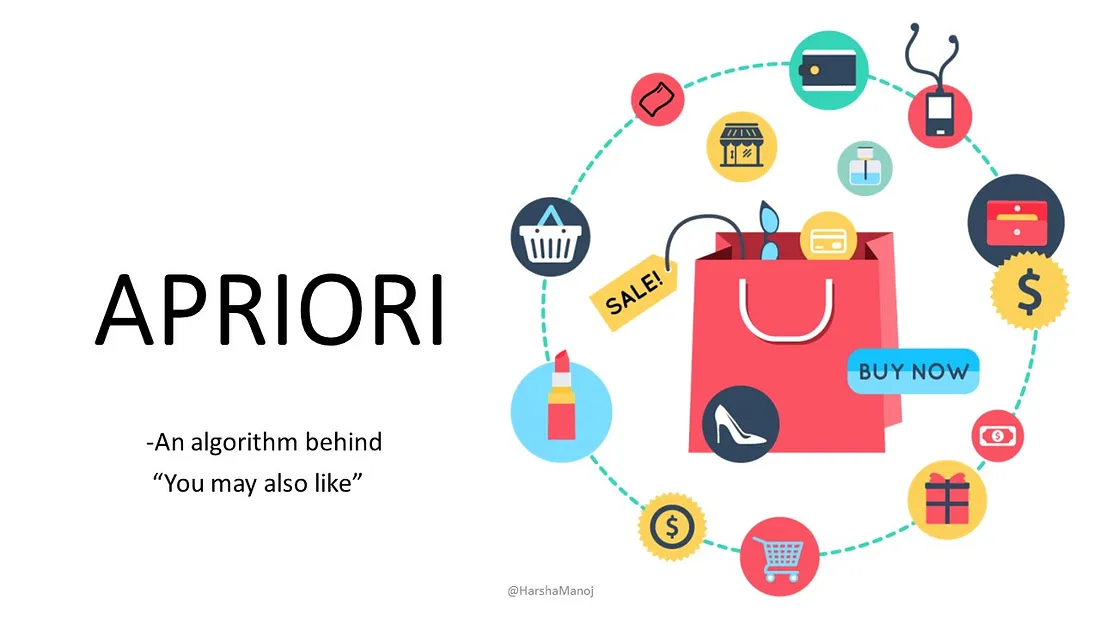

The **Apriori model** is a popular algorithm used in data mining to find patterns and relationships in large datasets. It’s particularly useful for understanding which items are frequently bought together. This is often used in market basket analysis to help businesses understand customer purchasing behavior.<br><br>

**How Does It Work?**

`Find Frequent Itemsets`:

* The Apriori model looks for groups of items that appear together frequently in transactions. For example, it might find that bread and butter are often bought together.

`Generate Association Rules`:

* Once it identifies these common itemsets, the model generates association rules. These rules show how likely it is that one item is bought if another item is bought. For example, a rule might be "If a customer buys bread, they are likely to buy butter."<br><br>

## Importing the libraries

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=1860c2915d1d85d1bbfdc8402100c9619ecb93a900f7a9e73462477d60d17bd2
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

**About dataset**

This dataset is used for market basket analysis, which is a common technique in retail to understand customer purchase behavior. The dataset contains transaction data from a retail store or online shopping platform. The goal is to identify patterns or associations between items that are frequently bought together.

In [12]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
print("lenght of the dataset :",len(dataset))

lenght of the dataset : 7501


In [14]:
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

### first customer transactions

In [17]:
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

### second customer transactions

In [18]:
transactions[1]

['burgers',
 'meatballs',
 'eggs',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

## Training the Apriori model on the dataset

In [4]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)


**`min_support`**

* **Purpose**: Determines how frequently an itemset must appear in your dataset to be considered.

* **High min_support**: If you set a high value (e.g., 0.01), you’re looking for itemsets that appear in at least 1% of transactions. This is useful for finding very common patterns.

* **Low min_support**: A low value (e.g., 0.003) allows you to find less common patterns. For 7,501 transactions, min_support=0.003 means you’re looking for itemsets that appear in at least 3% of transactions (0.003 * 7501 = 22.5, so around 23 transactions).

* **Example**:

    If you set min_support=0.003, you are asking the algorithm to find itemsets that appear in at least 0.3% of transactions. This helps in finding both common and less common patterns.<br><br>


**`min_confidence`**

* **Purpose**: Measures how likely it is that an item B will be purchased when item A is purchased.

* **Higher min_confidence**: If you set a higher value (e.g., 0.6), you want rules where the likelihood of buying item B given item A is quite high. This gives stronger rules but fewer results.

* **Lower min_confidence**: A lower value (e.g., 0.2) will include more rules, but they might be less reliable.

* **Example**:
Setting min_confidence=0.2 means you're interested in rules where there's at least a 20% chance that if a customer buys one item, they will also buy the other.<br><br>

**`min_lift`**

* **Purpose**: Indicates how much more often items are bought together compared to if they were independent.

    * Lift = 1: The items are bought together exactly as much as you'd expect by chance. There's no special relationship.

    * Lift > 1: The items are bought together more often than you'd expect by chance. This indicates a positive relationship.

    * Lift < 1: The items are bought together less often than you'd expect. This might mean they're not really related.<br><br>


* **Higher min_lift**: A higher value (e.g., 3) means you’re looking for strong associations. A lift of 3 means the items are bought together 3 times more often than expected by chance.
Lower min_lift: A lower value (e.g., 1) will include weaker associations.

* **Lower min_lift**: A lower value (e.g., 1) will include weaker associations.

* **Example**:

    Setting min_lift=3 ensures that the item pairs are bought together much more often than random chance. This helps in finding strong, meaningful associations.<br><br>



**`min_length and max_length`**

* **Purpose**: Control the number of items in each rule.


* **min_length**: The minimum number of items in the itemsets. Setting min_length=2 ensures you only get pairs.

* **max_length**: The maximum number of items. Setting max_length=2 limits the results to pairs only.

* **Example**:

    If you set both min_length and max_length to 2, you’re only looking for rules that involve exactly two items. If you want to find patterns with more items, you would increase max_length.

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [5]:
results = list(rules)

In [24]:
for rule in results:
    print(f"Rule: {rule.items}, Support: {rule.support}, Confidence: {rule.ordered_statistics[0].confidence}, Lift: {rule.ordered_statistics[0].lift}")

Rule: frozenset({'light cream', 'chicken'}), Support: 0.004532728969470737, Confidence: 0.29059829059829057, Lift: 4.84395061728395
Rule: frozenset({'mushroom cream sauce', 'escalope'}), Support: 0.005732568990801226, Confidence: 0.3006993006993007, Lift: 3.790832696715049
Rule: frozenset({'pasta', 'escalope'}), Support: 0.005865884548726837, Confidence: 0.3728813559322034, Lift: 4.700811850163794
Rule: frozenset({'fromage blanc', 'honey'}), Support: 0.003332888948140248, Confidence: 0.2450980392156863, Lift: 5.164270764485569
Rule: frozenset({'ground beef', 'herb & pepper'}), Support: 0.015997866951073192, Confidence: 0.3234501347708895, Lift: 3.2919938411349285
Rule: frozenset({'ground beef', 'tomato sauce'}), Support: 0.005332622317024397, Confidence: 0.3773584905660377, Lift: 3.840659481324083
Rule: frozenset({'light cream', 'olive oil'}), Support: 0.003199573390214638, Confidence: 0.20512820512820515, Lift: 3.1147098515519573
Rule: frozenset({'olive oil', 'whole wheat pasta'}), Su

### Iterating through each record and printing the details

In [20]:
for record in results:
    items = list(record.items)
    support = record.support
    for statistic in record.ordered_statistics:
        items_base = list(statistic.items_base)
        items_add = list(statistic.items_add)
        confidence = statistic.confidence
        lift = statistic.lift

        print(f"Items: {items}")
        print(f"Support: {support}")
        print(f"Base Items: {items_base}")
        print(f"Add Items: {items_add}")
        print(f"Confidence: {confidence}")
        print(f"Lift: {lift}")
        print("-" * 50)

Items: ['light cream', 'chicken']
Support: 0.004532728969470737
Base Items: ['light cream']
Add Items: ['chicken']
Confidence: 0.29059829059829057
Lift: 4.84395061728395
--------------------------------------------------
Items: ['mushroom cream sauce', 'escalope']
Support: 0.005732568990801226
Base Items: ['mushroom cream sauce']
Add Items: ['escalope']
Confidence: 0.3006993006993007
Lift: 3.790832696715049
--------------------------------------------------
Items: ['pasta', 'escalope']
Support: 0.005865884548726837
Base Items: ['pasta']
Add Items: ['escalope']
Confidence: 0.3728813559322034
Lift: 4.700811850163794
--------------------------------------------------
Items: ['fromage blanc', 'honey']
Support: 0.003332888948140248
Base Items: ['fromage blanc']
Add Items: ['honey']
Confidence: 0.2450980392156863
Lift: 5.164270764485569
--------------------------------------------------
Items: ['ground beef', 'herb & pepper']
Support: 0.015997866951073192
Base Items: ['herb & pepper']
Add It

### Putting the results well organised into a Pandas DataFrame

In [21]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [22]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Displaying the results sorted by descending lifts

**When the lift value is 5**, it means that the items are bought together 5 times **more often** than you would expect if the items were bought independently of each other.<br><br>

**Understanding “More Often”**
When we say items are bought together “more often”, it means they appear together in transactions more frequently than what we would expect if their purchases were completely unrelated.


In [9]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


END